In [1]:
!pip install numpy

zsh:1: command not found: pip


In [29]:
import pandas as pd
from prophet import Prophet

In [30]:
df = pd.read_csv('Apr_2023.csv')
df = df[['Timestamp','Island_mode_MCCB_Active_Power']]
df

,Timestamp,Island_mode_MCCB_Active_Power
0,2023/04/01 00:00:01,-123.0
1,2023/04/01 00:00:11,-87.0
2,2023/04/01 00:00:21,-116.0
3,2023/04/01 00:00:31,-115.0
4,2023/04/01 00:00:41,-128.0
...,...,...
267619,2023/04/31 23:23:11,-999999.0
267620,2023/04/31 23:23:21,-999999.0
267621,2023/04/31 23:23:31,-999999.0
267622,2023/04/31 23:23:41,-999999.0


In [31]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
df = df[~((df['Timestamp'].dt.month == 4) & (df['Timestamp'].dt.day == 31))]
df = df.dropna(subset=['Timestamp'])
df = df.rename(columns={"Timestamp": "ds", "Island_mode_MCCB_Active_Power": "y"})
df_no_outlier = df[69120:] #8640 entries per day

In [32]:
#fits data without outlier data, fit with outlier data is below
m = Prophet()
m.fit(df_no_outlier)

02:43:06 - cmdstanpy - INFO - Chain [1] start processing
02:45:03 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future = m.make_future_dataframe(periods=2)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190077,2023-04-30 23:59:31,-9.032955,-17.935388,0.030829
190078,2023-04-30 23:59:41,-9.028563,-17.860953,-0.784741
190079,2023-04-30 23:59:51,-9.024178,-17.372982,-0.391836
190080,2023-05-01 23:59:51,0.461804,-29.862208,28.864855
190081,2023-05-02 23:59:51,-12.516246,-102.797112,79.585333


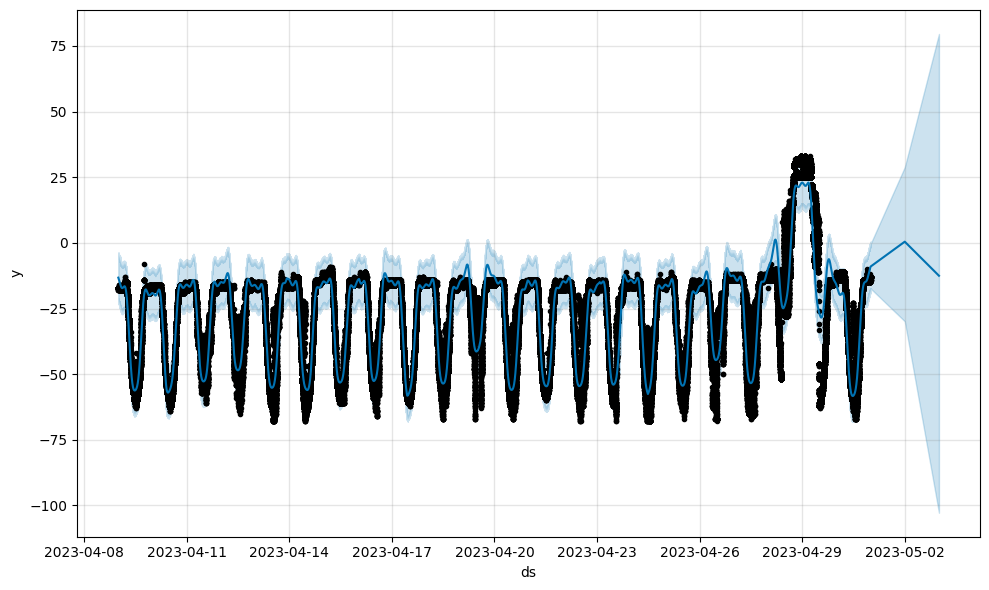

In [34]:
fig1 = m.plot(forecast)

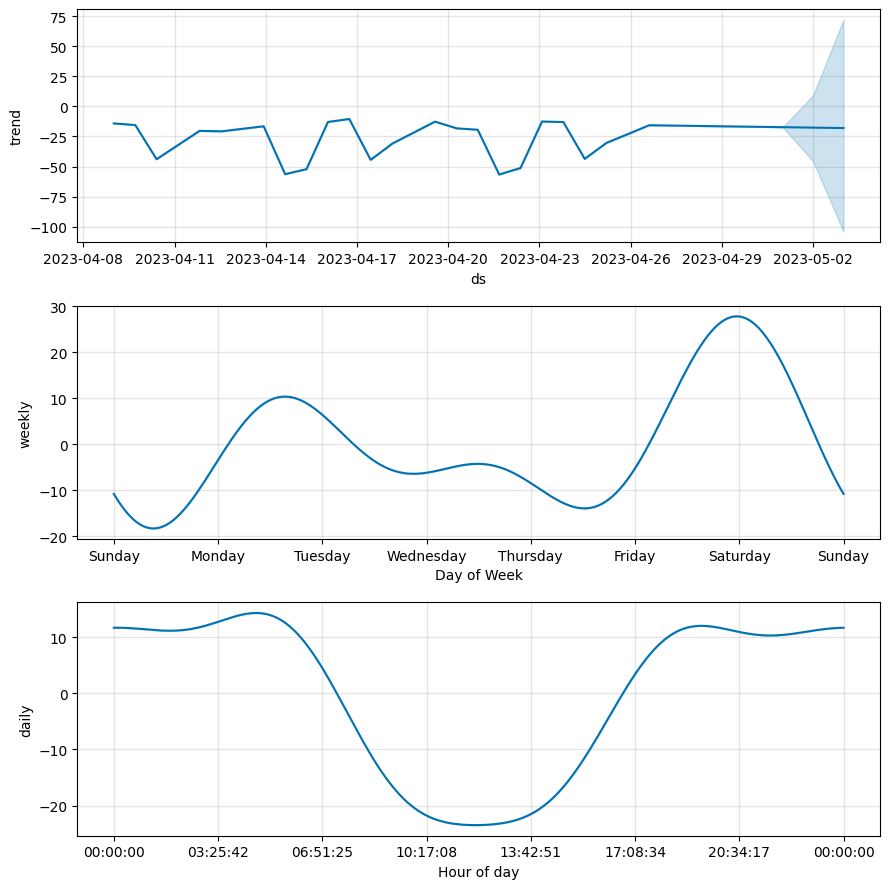

In [35]:
fig2 = m.plot_components(forecast)

In [ ]:
# this cell runs the regression with the outlier data. Caution as it will take some time to run
m.prophet()
m.fit(df)
future = m.make_future_dataframe(periods=2)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)